In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [25]:
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout
import math

In [3]:
data = pd.read_csv('modeling/Data/Data Given/MMM.csv')

In [4]:
d2 = data.dropna()
d2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2009,57.549999,59.389999,57.520000,59.189999,45.690918,5313900.0
1,1/5/2009,58.790001,59.090000,58.110001,58.500000,45.158264,3768800.0
2,1/6/2009,58.740002,59.810001,58.610001,59.189999,45.690918,4966200.0
3,1/7/2009,58.610001,58.959999,57.580002,58.070000,44.826347,4598100.0
4,1/8/2009,57.680000,58.709999,57.450001,58.580002,45.220032,3944900.0


In [84]:
mm = d2.iloc[:,4:5].values

In [85]:
scaler = MinMaxScaler(feature_range = (0, 1))

trans_mm= scaler.fit_transform(mm)

In [88]:
features_set = []  
labels = []  
for i in range(60, len(mm)):  
    features_set.append(trans_mm[i-60:i, 0])
    labels.append(trans_mm[i, 0])
features_set, labels = np.array(features_set), np.array(labels)
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [89]:
TRAIN_SIZE = 0.60

train_size = int(len(trans_mm) * TRAIN_SIZE)
test_size = 32
train, test = trans_mm[0:train_size, :], trans_mm[:test_size, :]

def create_dataset(trans_mm, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(trans_mm) - window_size - 1):
        a = trans_mm[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(trans_mm[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

In [91]:
def fit_model(train_X, train_Y, window_size = 1):
    model = Sequential()
    
    model.add(LSTM(4, 
                   input_shape = (1, window_size)))
    model.add(Dense(1))
    model.compile(loss = "mean_squared_error", 
                  optimizer = "adam")
    model.fit(train_X, 
              train_Y, 
              epochs = 100, 
              batch_size = 1, 
              verbose = 2)
    
    return(model)

# Fit the first model.
model1 = fit_model(train_X, train_Y, window_size)

Epoch 1/100
 - 6s - loss: 0.0091
Epoch 2/100
 - 4s - loss: 4.9202e-04
Epoch 3/100
 - 4s - loss: 5.3965e-05
Epoch 4/100
 - 4s - loss: 4.9152e-05
Epoch 5/100
 - 4s - loss: 4.4658e-05
Epoch 6/100
 - 4s - loss: 4.2348e-05
Epoch 7/100
 - 4s - loss: 3.9225e-05
Epoch 8/100
 - 4s - loss: 3.6663e-05
Epoch 9/100
 - 4s - loss: 3.5866e-05
Epoch 10/100
 - 4s - loss: 3.6677e-05
Epoch 11/100
 - 4s - loss: 3.6826e-05
Epoch 12/100
 - 4s - loss: 3.7167e-05
Epoch 13/100
 - 4s - loss: 3.4817e-05
Epoch 14/100
 - 4s - loss: 3.5414e-05
Epoch 15/100
 - 4s - loss: 3.6480e-05
Epoch 16/100
 - 4s - loss: 3.6402e-05
Epoch 17/100
 - 4s - loss: 3.5622e-05
Epoch 18/100
 - 4s - loss: 3.6331e-05
Epoch 19/100
 - 4s - loss: 3.6040e-05
Epoch 20/100
 - 4s - loss: 3.6661e-05
Epoch 21/100
 - 4s - loss: 3.4969e-05
Epoch 22/100
 - 4s - loss: 3.5669e-05
Epoch 23/100
 - 4s - loss: 3.6077e-05
Epoch 24/100
 - 4s - loss: 3.5787e-05
Epoch 25/100
 - 4s - loss: 3.6823e-05
Epoch 26/100
 - 4s - loss: 3.5982e-05
Epoch 27/100
 - 4s - loss

In [92]:
def predict_and_score(model, X, Y):
    # Make predictions on the original scale of the data.
    pred = scaler.inverse_transform(model.predict(X))
    # Prepare Y data to also be on the original scale for interpretability.
    orig_data = scaler.inverse_transform([Y])
    # Calculate RMSE.
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)

In [93]:
print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

Training data score: 1.28 RMSE
Test data score: 1.33 RMSE


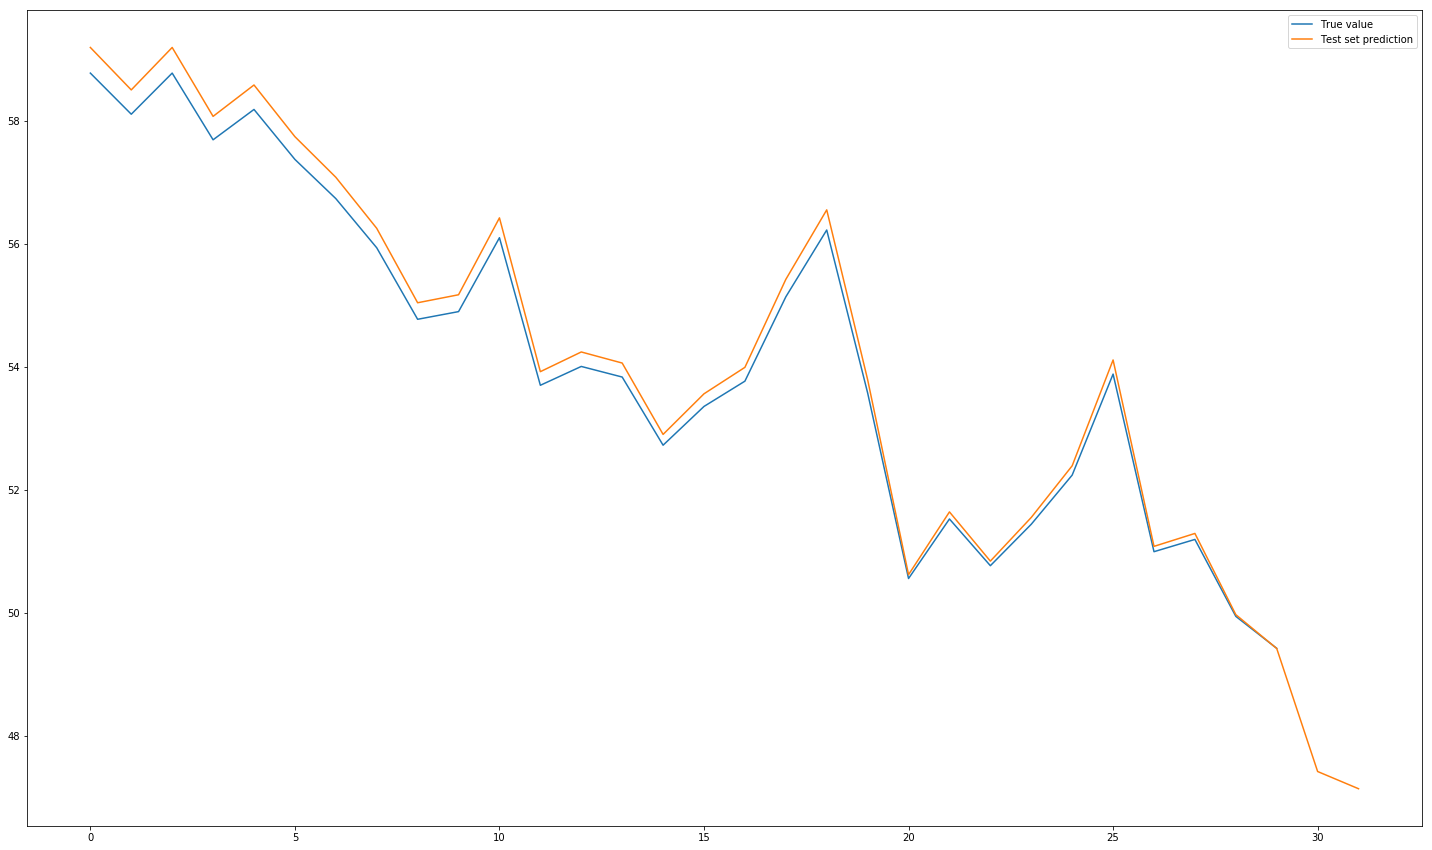

In [94]:
# Create the plot.
plt.figure(figsize = (25, 15))
plt.plot(test_predict, label = "True value")
#plt.plot(train_predict_plot, label = "Training set prediction")
plt.plot(scaler.inverse_transform(test), label = "Test set prediction")
plt.legend()
plt.show()